参考资料：[Python图像处理库:pillow](http://www.hjqjk.com/2017/Image-processing-library-of-python-pillow.html)

# Image 类
Pillow 中最重要的类就是 Image，该类存在于同名的模块中。可以通过以下几种方式实例化：从文件中读取图片，处理其他图片得到，或者直接创建一个图片。

## 使用 Image 模块中的 `open` 函数打开一张图片：

In [1]:
from PIL import Image

In [40]:
im = Image.open('E:/Images/5a2e2075f331d.png')

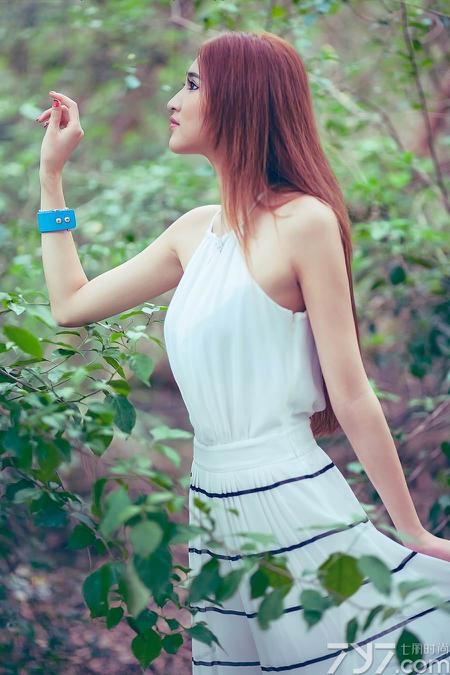

In [41]:
im

如果打开成功，返回一个 Image 对象，可以通过对象属性检查文件内容：

In [18]:
print(im.format, im.size, im.mode)

PNG (1920, 1080) RGBA


- `format`属性定义了图像的格式（`PNG`, `JPG`, `None`），如果图像不是从文件打开的，那么该属性值为 `None`；
- `size` 属性是一个二元 `tuple`，表示图像的宽和高（单位为像素 `px`）；
- `mode` 属性为表示图像的模式，常用的模式为：`L` （luminance）为灰度图，`RGB` 为真彩色，`CMYK` 为 pre-press 图像。官方说明-[图像模式完整列表](http://effbot.org/imagingbook/concepts.htm#mode)
- `palette` : 仅当 mode 为 P 时有效，返回 ImagePalette 实例
- `info` : 以字典的形式返回实例的信息

如果文件不能打开，则抛出 `IOError` 异常。

当有一个 `Image` 对象时，可以用 `Image` 类的各个方法进行处理和操作图像：

## 读写图片
Pillow 库支持相当多的图片格式。直接使用 Image 模块中的 `open()` 函数读取图片，而不必先处理图片的格式，Pillow 库自动根据文件决定格式。
Image 模块中的 `save()` 函数可以保存图片，除非你指定文件格式，那么文件名中的扩展名用来指定文件格式。

例子：转换图像格式的脚本（`jpg` 转为 `png` 格式）

In [ ]:
im.save('E:/Images/5a2e2075f331d.png', 'jpeg')

In [14]:
import os

In [21]:
root = 'E:/Images/'

In [29]:
for name in os.listdir(root):
    infile = root + name
    f, e = os.path.splitext(infile)   # f 变量是除扩展名以外的文件名，e 变量是扩展名
    if os.path.isfile(infile):
        outfile = f +".png"  # 拼凑输出文件名
        print(f)
        if infile != outfile:   # 保存的图像格式跟原图像格式不一样
            try:
                Image.open(infile).save(outfile)  # 转换图像格式
            except IOError:
                print("Cannot convert", infile)  # 图像无法打开，则处理异常

E:/Images/5a2e206693e4d
E:/Images/5a2e2075f331d
E:/Images/psb
E:/Images/psb1
E:/Images/README
Cannot convert E:/Images/README.md
E:/Images/thIZ7ILLM5
E:/Images/thO3CXS0S3
E:/Images/water


## 创建缩略图

缩略图是网络开发或者图像软件预览常用的一种基本技术，使用 Python 的 Pillow 图像库可以很方便地建立缩略图。

Image 类的 `thumbnail()` 方法可以用来制作缩略图。它接受一个二元数组作为缩略图的尺寸，然后将实例缩小到指定尺寸。

例子：生成 `JPEG` 缩略图，大小是原图像的四分之一

In [35]:
for name in os.listdir(root):
    infile = root + name
    if os.path.isfile(infile):
        outfile = os.path.splitext(infile)[0] + ".thumbnail" # 缩略图文件名+后缀
        if infile != outfile:
            try:
                im   = Image.open(infile) # 打开图像
                x, y = im.size  # 获取原图像的大小（width、height）
                im.thumbnail((x//2, y//2)) # 缩略图大小
                im.save(outfile, "JPEG") # 保存为 JPEG 格式
            except IOError:
                print("cannot create thumbnail for", infile)

cannot create thumbnail for E:/Images/5a2e206693e4d.png
cannot create thumbnail for E:/Images/5a2e2075f331d.png
cannot create thumbnail for E:/Images/README.md


注意：Pillow 库不会直接解码或者加载图像栅格数据。当你打开一个文件，只会读取文件头信息用来确定格式，颜色模式，大小等等，文件的剩余部分不会主动处理。这意味着打开一个图像文件的操作十分快速，跟图像大小和压缩方式无关。

## 图像的剪切、粘贴与合并操作

Image 类包含很多操作图像区域的方法。

### 裁剪子矩形

`crop()` 方法可以从图像中提取一个子矩形选区，如下：

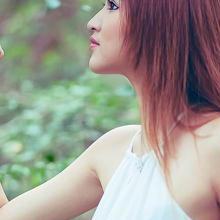

In [63]:
im = Image.open('E:/Images/5a2e2075f331d.png')
box = (80, 80, 300, 300)
region = im.crop(box)
region

矩形选区区域由一个 $4$ 元元组决定，元组信息表示 `(左,上,右,下)` 的坐标。Pillow 库以图像左上角为坐标原点 $(0,0)$，单位是 `px` 。
因此，上述代码是复制了一个 $220 \times 220$ pixels 的矩形选区。

## 处理子图，粘贴回原图


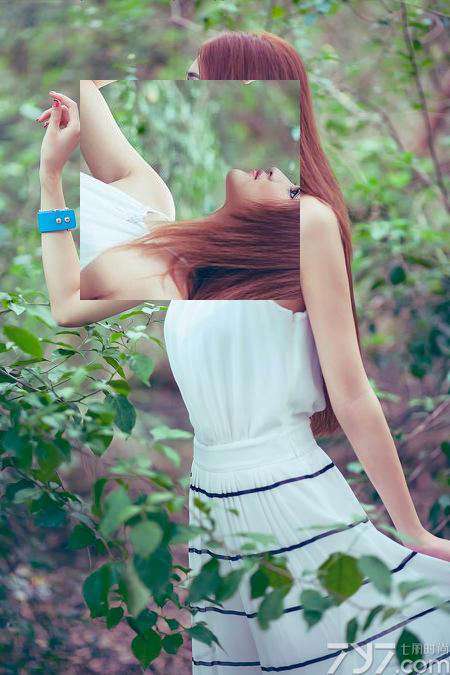

In [64]:
region = region.transpose(Image.ROTATE_270)   # 旋转180°
im.paste(region, box)
im

`transpose()` 方法可以将图片左右颠倒、上下颠倒、旋转 $90°$、旋转 $180°$ 或旋转 $270°$。`paste()` 方法则可以将一个 Image 实例粘贴到另一个 Image 实例上。

In [66]:
def roll(image, delta):
    "Roll an image sideways"

    xsize, ysize = image.size

    delta = delta % xsize  # 翻卷多少像素
    if delta == 0: return image   # 不翻卷图形

    part1 = image.crop((0, 0, delta, ysize))  # 左边矩形选区
    part2 = image.crop((delta, 0, xsize, ysize))  # 右边矩形选区
    part1.load() 
    part2.load()
    image.paste(part2, (0, 0, xsize-delta, ysize)) # 原右边图形贴到左边
    image.paste(part1, (xsize-delta, 0, xsize, ysize))  # 原左边图形贴到右边

    return image


im = Image.open('E:/Images/5a2e2075f331d.png')
print(im.size)   # (356, 362)

roll(im,100).save('E:/Images/5a2e2075f331d.png','JPEG')

(450, 675)


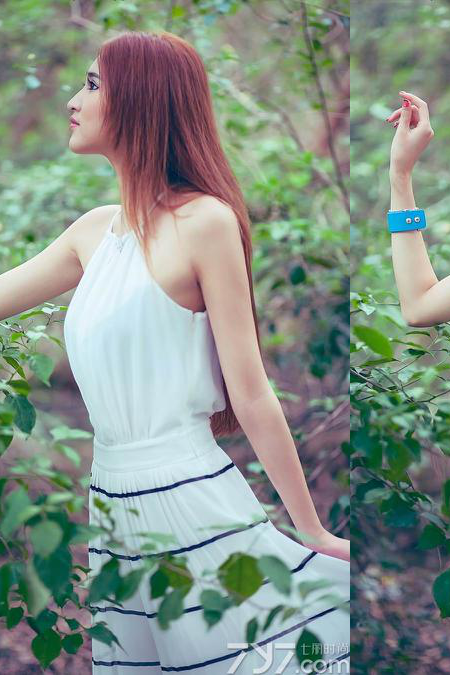

In [67]:
im

要注意的是，当你使用 `crop()` 方法来修改图像文件的时候, `load()` 方法会首先被调用。这是由于修改是一个惰性操作。如果 `load()` 未被调用，那么在 `paste` 使用前都不会执行修改这个操作。这暗示着 `part1` 会在首次修改 `image` 的时候被修改。

## 分离和合并颜色通道
对于多通道图像，有时候处理时希望能够分别对每个通道处理，处理完成后重新合成多通道，如下：

In [68]:
r, g, b = im.split()
im = Image.merge('RGB', (r, g, b))

对于 `split()` 函数，如果是单通道的，则返回其本身。否则，返回各个通道。

## 几何变换

Image 类包含了 `resize()` 和 `rotate` 方法来变换图像。前者需要传入一个表示新大小的元组，后者需要传入旋转的角度。

### 简单的几何变换

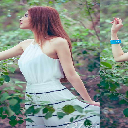

In [73]:
out = im.resize((128, 128))
out

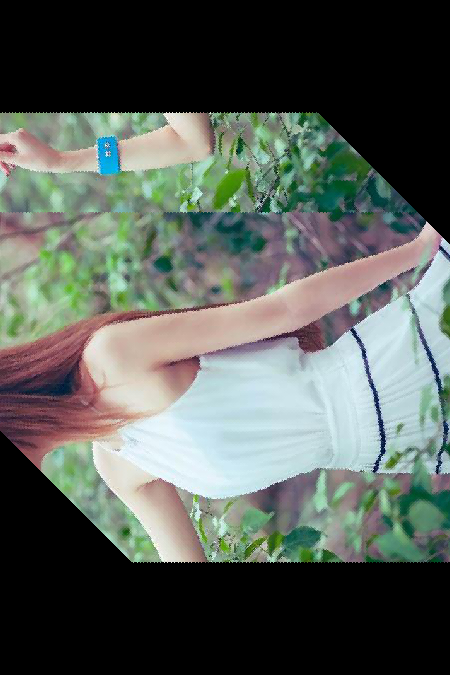

In [76]:
rout = out.rotate(45)         # 顺时针角度表示
rout

## 旋转图像

In [77]:
out = im.transpose(Image.FLIP_LEFT_RIGHT) # 左右颠倒
out = im.transpose(Image.FLIP_TOP_BOTTOM) # 上下颠倒
out = im.transpose(Image.ROTATE_90)  # 旋转90°
out = im.transpose(Image.ROTATE_180)  # 旋转180°
out = im.transpose(Image.ROTATE_270)  # 旋转270°

更通用的图像变换方法可以使用 [`transform()`](http://pillow-zh-cn.readthedocs.io/zh_CN/latest/reference/Image.html#PIL.Image.Image.transform)

# ImageDraw模块

ImageDraw 模块提供了 `Draw` 类，它能在 `Image` 实例上进行简单的 2D 绘画。你可以使用这个模块来创建新图像或者修饰现有图像。

有关 PIL 的更高级绘图库，可以参考 [aggdraw模块](http://effbot.org/zone/aggdraw-index.htm)

## 创建 Draw 类的实例
要在 Image 实例上绘制新的图样，首先要创建一个 `Draw` 类的实例。

这里粗略介绍下 Draw 类中的基本绘画操作函数(英文都是函数名)：
- 弦/弧/扇形: `chord` / `arc` / `pieslice`
- 椭圆: `ellipse`
- 线段/多段线: `line`
- 点: `point`
- 多边形: `polygon`
- 矩形: `rectangle`
- 文字: `text`
- 文字大小: `textsize`

详细的使用说明，请看官方文档：[Draw 类的各函数使用说明](https://pillow.readthedocs.io/en/latest/reference/ImageDraw.html)

### 画直线

Draw 类提供了 `line(xy,options)` 函数绘制直线。
其中 `xy` 表示坐标列表，它可以是任何包含 $2$ 元组 `[(x,y),…]` 或者数字 `[x,y,…]` 的序列对象，至少包含两个坐标：
- `[(x1, y1), (x2, y2), …]` ：包含若干个元组的列表
- `[x1, y1, x2, y2, …]` ：按照顺序包含坐标信息的列表
- `[x1, y1, (x2, y2), …]` ：以上两种情况的混合
- `((x1, y1), (x2, y2), …)` ：包含若干个元组的元组
- `(x1, y1, x2, y2, …)` ：按照顺序包含坐标信息的元组
- `(x1, y1, (x2, y2), …)` ：以上两种情况的混合
- `options` 可用的选项：
    - `fill = (R,G,B)` ：指定线条颜色
    - `width = integer` ：指定线条宽度，单位是px

In [78]:
from PIL import Image,ImageDraw
im = Image.open('E:/Images/5a2e2075f331d.png')
drawAvatar = ImageDraw.Draw(im)

xSize,ySize = im.size

# 三等分位置
drawAvatar.line([0, 0.33 * ySize, xSize, 0.33 * ySize],\
    fill = (255, 100, 0), width = 3)
# 左下角到中心点，右下角到中心点
drawAvatar.line([(0, ySize), (0.5 * xSize, 0.5 * ySize), (xSize, ySize)],\
    fill = (255, 0, 0), width = 3)

im.save('E:/Images/5a2e2075f331d.jpg')

参考资料：
- [PIL 简明教程 - 在现有的图片上涂涂改改](https://liam0205.me/2015/05/05/pil-tutorial-imagedraw-and-imagefont/)